In [ ]:
!pip install causaldata dowhy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.5 MB/s eta 0:00:00
  Created wheel for causaldata: filename=causaldata-0.1.5-py3-none-any.whl size=2767647 sha256=f1f843a30ce22f407fdf5663402928a13772e3825ddae9272bf53984b77866e3
  Stored in directory: /root/.cache/pip/wheels/a1/95/51/be0bfa2c4f83a33917ee3cd85710d8dedd323aee8000b7931a
Successfully built causaldata
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstalled Cython-3.0.11


Index(['rownames', 'treat', 'age', 'educ', 'race', 'married', 'nodegree',
       're74', 're75', 're78'],
      dtype='object')
['black' 'hispan' 'white']


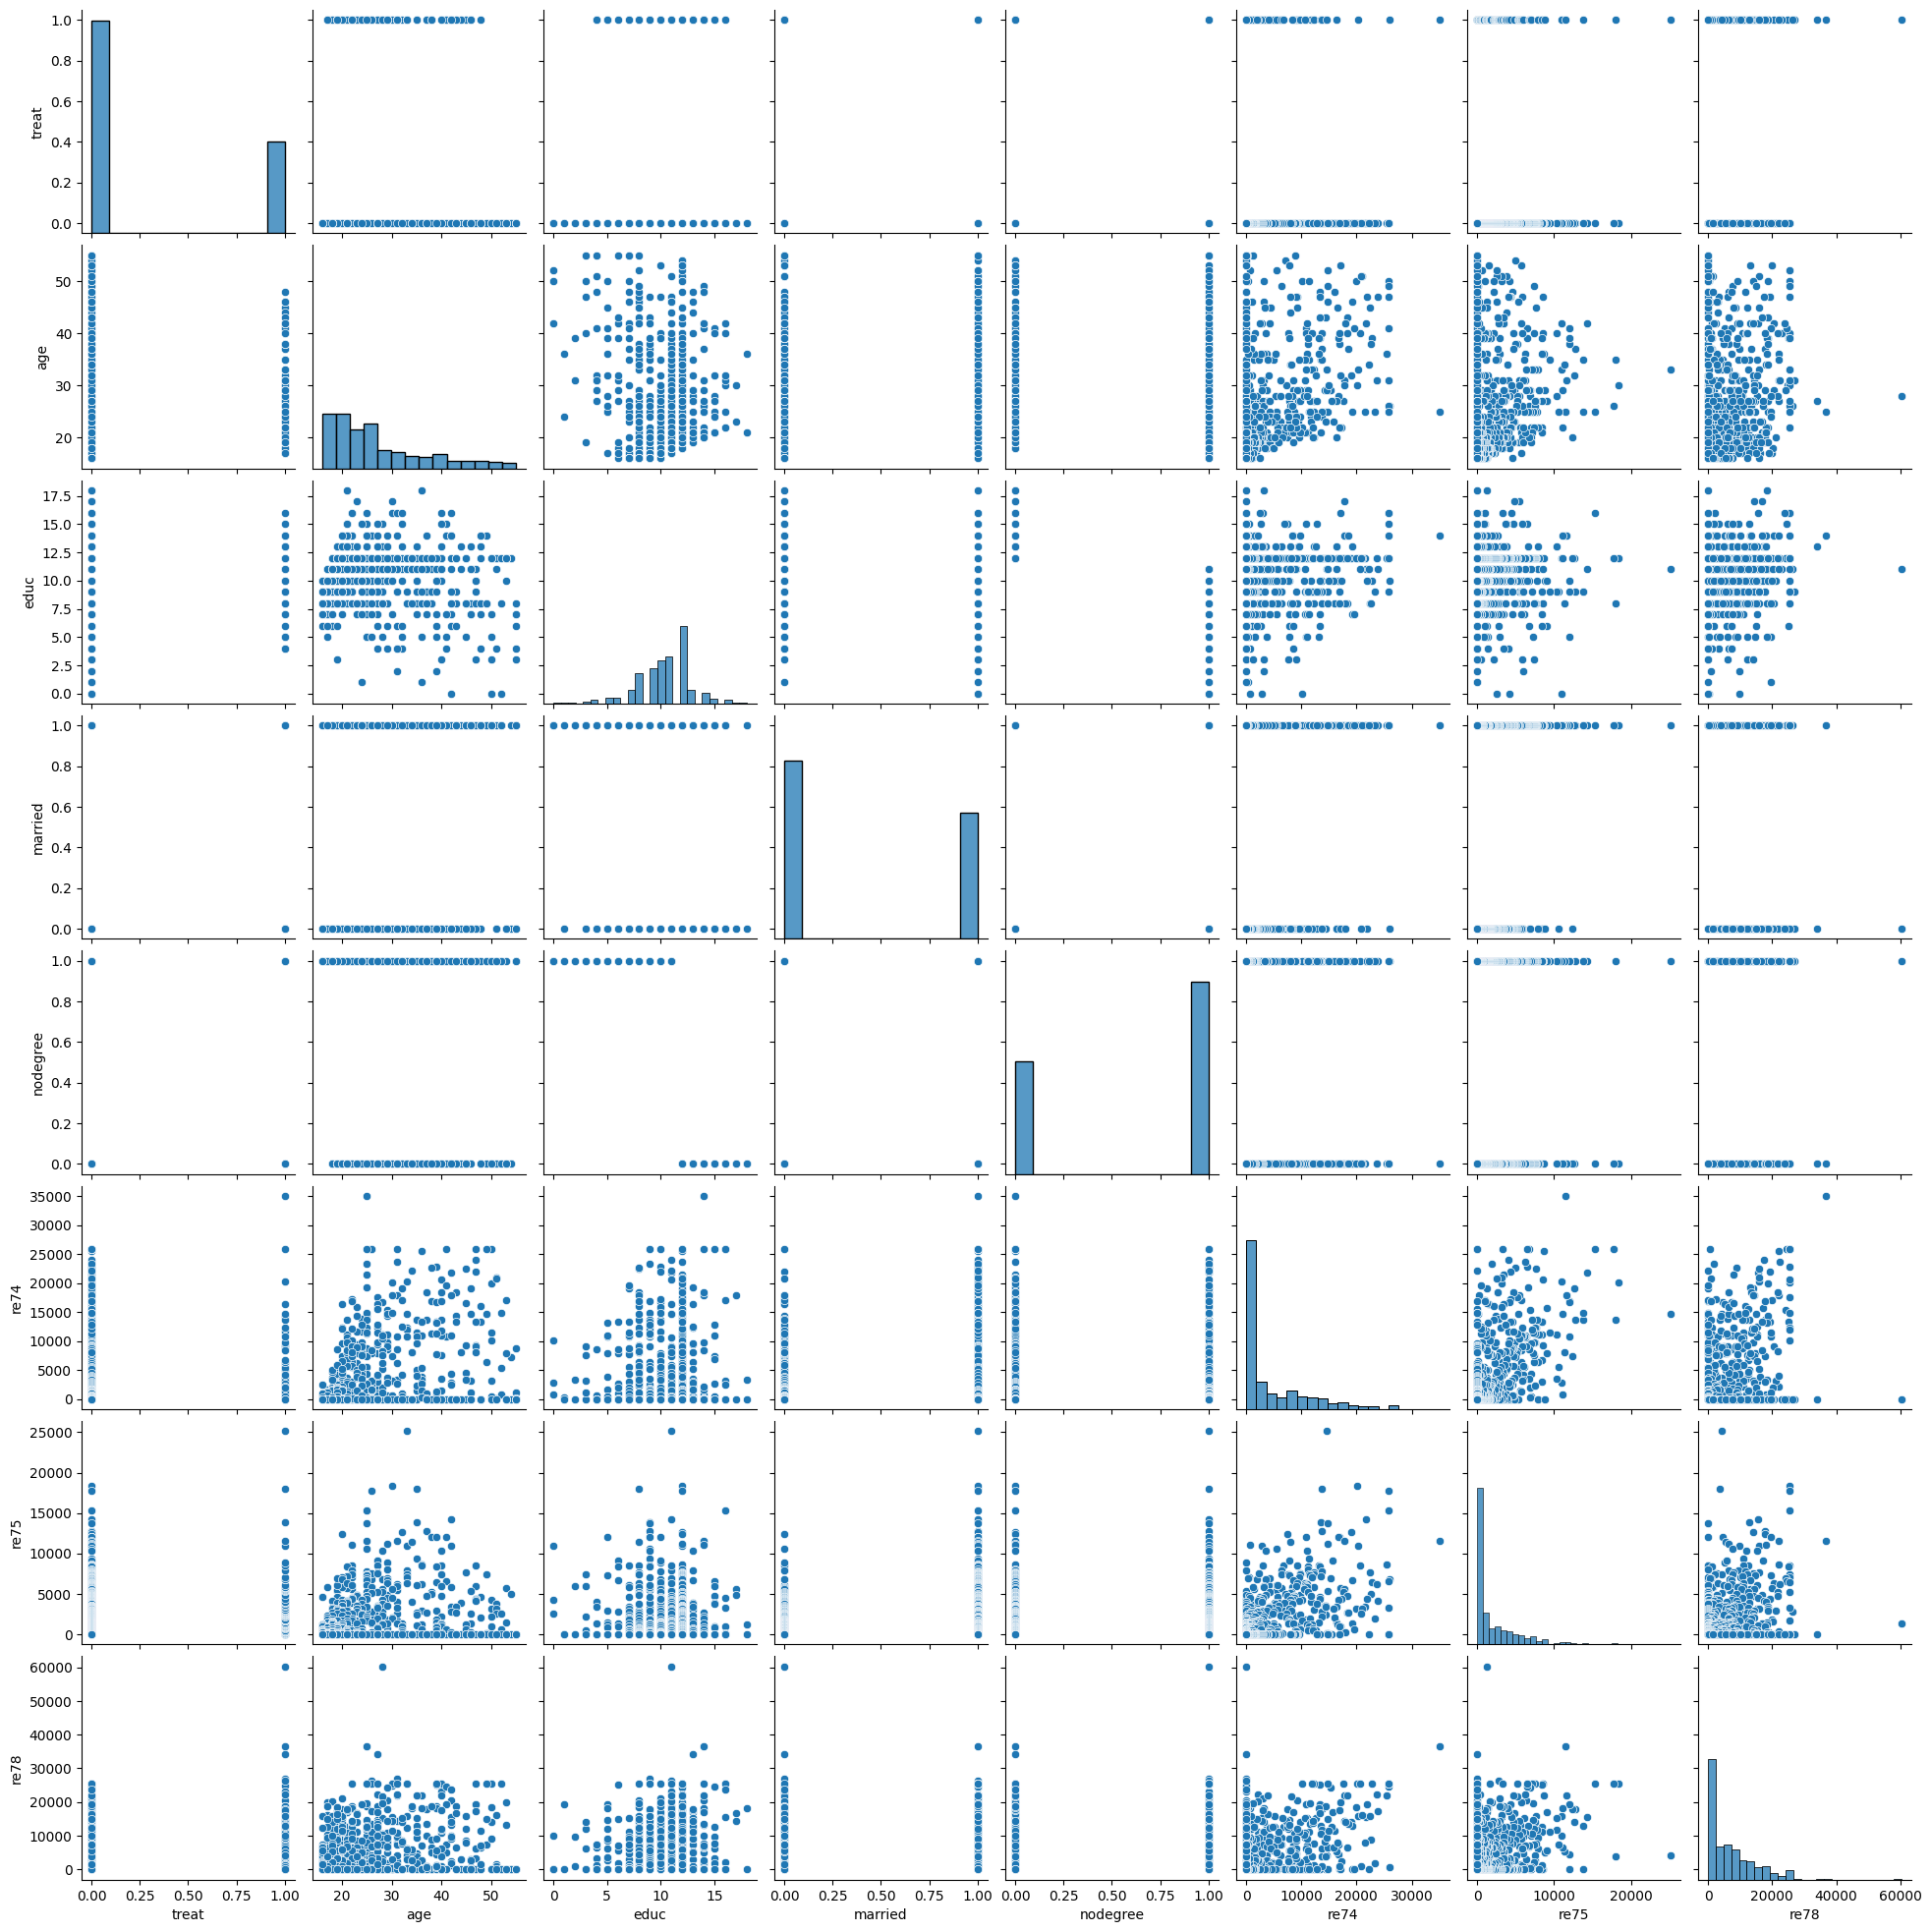

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Identified Estimand:  Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                      
────────(E[re78|re75,married,nodegree,age,re74,race,educ])
d[treat]                                                  
Estimand assumption 1, Unconfoundedness: If U→{treat} and U→re78 then P(re78|treat,re75,married,nodegree,age,re74,race,educ,U) = P(re78|treat,re75,married,nodegree,age,re74,race,educ)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Causal Estimate:  *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                      
────────(E[re78|re75,married,nodegree,age,re74,race,educ])
d[treat]                                                  
Estimand assumption 1,

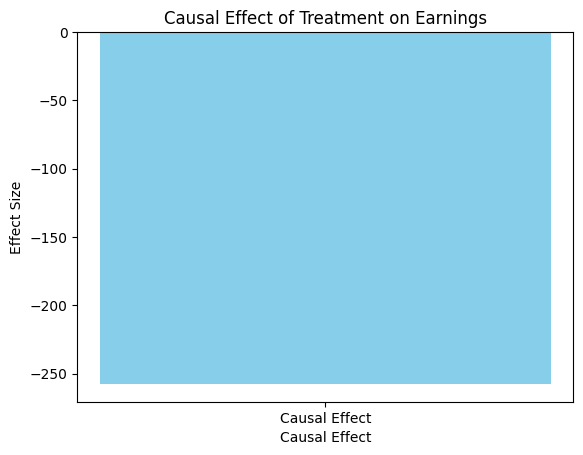

Refutation using placebo treatment:  Refute: Use a Placebo Treatment
Estimated effect:-257.6015286319217
New effect:-6.134060308794785
p value:0.98

Refutation using data subset:  Refute: Use a subset of data
Estimated effect:-257.6015286319217
New effect:-16.074836151323826
p value:0.8



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dowhy import CausalModel

# Step 1: Load and preprocess data
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/MatchIt/lalonde.csv"
data = pd.read_csv(url)

# Inspect the columns to understand the structure of the dataset
print(data.columns)

# Remove the first column if it exists and is just an index
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Inspect the unique values in the 'race' column
print(data['race'].unique())

# Step 2: Visualize the data
sns.pairplot(data)
plt.show()

# Step 3: Define the causal model
common_causes = ['age', 'educ', 'married', 'nodegree', 're74', 're75', 'race']
data = data[['treat', 're78'] + common_causes]

model = CausalModel(
    data=data,
    treatment='treat',
    outcome='re78',
    common_causes=common_causes
)

# Step 4: Identify the causal effect
identified_estimand = model.identify_effect()
print("Identified Estimand: ", identified_estimand)

# Step 5: Estimate the causal effect
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")
print("Causal Estimate: ", estimate)

# Step 6: Plot the causal effect
causal_effect_value = estimate.value
stderr = getattr(estimate, 'stderr', None)

fig, ax = plt.subplots()
if stderr is not None:
    ax.bar(["Causal Effect"], [causal_effect_value], yerr=[stderr], capsize=10, color='skyblue')
    plt.title("Causal Effect of Treatment on Earnings with Error Bars")
else:
    ax.bar(["Causal Effect"], [causal_effect_value], color='skyblue')
    plt.title("Causal Effect of Treatment on Earnings")
    print("Standard error not available for this estimation method.")

plt.ylabel("Effect Size")
plt.xlabel("Causal Effect")
plt.show()

# Step 7: Refute the estimate
if estimate.value is not None:
    refutation = model.refute_estimate(identified_estimand, estimate,
                                       method_name="placebo_treatment_refuter")
    print("Refutation using placebo treatment: ", refutation)

    refutation = model.refute_estimate(identified_estimand, estimate,
                                       method_name="data_subset_refuter")
    print("Refutation using data subset: ", refutation)
else:
    print("No valid estimate was provided, skipping refutation.")

In [ ]:
!pip install graphviz

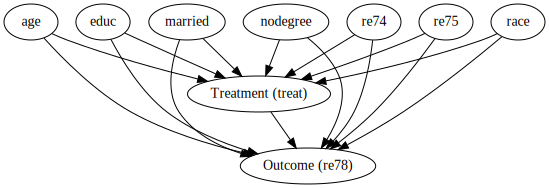

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dowhy import CausalModel
import graphviz
from IPython.display import display

# Step 1: Load and preprocess data
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/MatchIt/lalonde.csv"
data = pd.read_csv(url)

# Remove the first column if it exists and is just an index
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Step 2: Define the causal model
common_causes = ['age', 'educ', 'married', 'nodegree', 're74', 're75', 'race']
data = data[['treat', 're78'] + common_causes]

model = CausalModel(
    data=data,
    treatment='treat',
    outcome='re78',
    common_causes=common_causes
)

# Manually create the causal graph using graphviz
dot = graphviz.Digraph()

# Add nodes
dot.node('T', 'Treatment (treat)')
dot.node('Y', 'Outcome (re78)')
for cause in common_causes:
    dot.node(cause, cause)

# Add edges
dot.edge('T', 'Y')
for cause in common_causes:
    dot.edge(cause, 'T')
    dot.edge(cause, 'Y')

# Display the graph directly in the notebook
display(dot)